# Project: Investigate a Dataset - [No Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The No-Show-Appointment Dataset collects information from over a hundred thousand medical appointments in Brazil and it focused on the question of whether or not patient show up for their appointment. 

> <li> 01 PatientId - Identification of a patient </li>
> <li> 02 AppointmentID - Identification of each appointment </li>
> <li> 03 Gender - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. </li>
> <li> 04 DataMarcacaoConsulta - The day of the actuall appointment, when they have to visit the doctor. </li>
> <li> 05 DataAgendamento - The day someone called or registered the appointment, this is before appointment of course. </li>
> <li> 06 Age - How old is the patient. </li>
> <li> 07 Neighbourhood - Where the appointment takes place. </li>
> <li> 08 Scholarship - True of False </li>
> <li> 09 Hipertension - True or False </li>
> <li> 10 Diabetes - True or False </li>
> <li> 11 Alcoholism - True or False </li>
> <li> 12 Handcap - True or False </li>
> <li> 13 SMS_received - 1 or more messages sent to the patient. </li>
> <li> 14 No-show - True or False. </li>


### Question(s) for Analysis
> Based on the available data, my analysis questions are:
1. Are those on scholarship likely to show up on appointment date?
2. Are those being reached out by to SMS reminder more likely to show up on appointment date?
3. What Gender class take their appointment date more seriously?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

First I accessed my data using the pandas read function

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_app = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")

In [4]:
df_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df_app.shape

(110527, 14)

I check for null values and duplicated values.

In [6]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df_app.duplicated().sum()

0

In [8]:
df_app.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


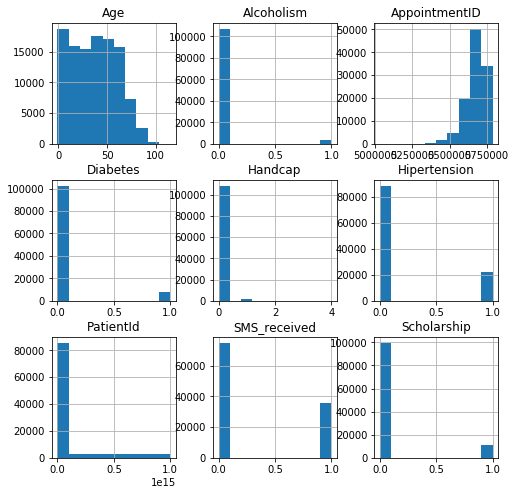

In [10]:
# Data Distribution of Numerical variables
df_app.hist(figsize=(8,8));


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

I am going to drop patientID, AppointmentID, ScheduledDay since they won't  be important to the question.

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_app.drop(["PatientId", "AppointmentID","AppointmentDay", "ScheduledDay", "Neighbourhood"], axis=1, inplace=True)

In [12]:
df_app.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


I am going rename my columns appropriately

In [13]:
df_app = df_app.rename(columns=lambda x: x.strip().lower().replace("-", "_"))
df_app.rename(columns={'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)

In [14]:
df_app.head(0)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


While accessing my data, I noticed a negative value -1 from the Age column. I am going to drop the row affected.

In [15]:
df_app[df_app['age'] == -1]

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,-1,0,0,0,0,0,0,No


In [16]:
df_app.drop(99832, axis=0, inplace=True)

In [17]:
df_app[df_app['age'] == -1]

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [18]:
df_app.shape

(110526, 9)

I will be changing columns to datatypes that i can appropriately work with. I will also be changing the value of the 'No show' data to integers and also convert its datatype to Boolean. Same goes for scholarship, hypertension, diabetes, alcoholism, handicap, no_show.

#### NO == 0, YES == 1

In [19]:
df_app['no_show'].replace({'No':0, 'Yes':1}, inplace=True)

In [20]:
names = ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'no_show']
for i in names:
    df_app[i] = df_app[i].astype('bool')

In [21]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
gender          110526 non-null object
age             110526 non-null int64
scholarship     110526 non-null bool
hypertension    110526 non-null bool
diabetes        110526 non-null bool
alcoholism      110526 non-null bool
handicap        110526 non-null bool
sms_received    110526 non-null int64
no_show         110526 non-null bool
dtypes: bool(6), int64(2), object(1)
memory usage: 4.0+ MB


In [22]:
df_app.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,False,True,False,False,False,0,False
1,M,56,False,False,False,False,False,0,False
2,F,62,False,False,False,False,False,0,False
3,F,8,False,False,False,False,False,0,False
4,F,56,False,True,True,False,False,0,False


In [23]:
df_app.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Overall Data Exploration

Let's analyse our dependent variable 'no_show'

In [24]:
df_app.no_show.value_counts()

False    88207
True     22319
Name: no_show, dtype: int64

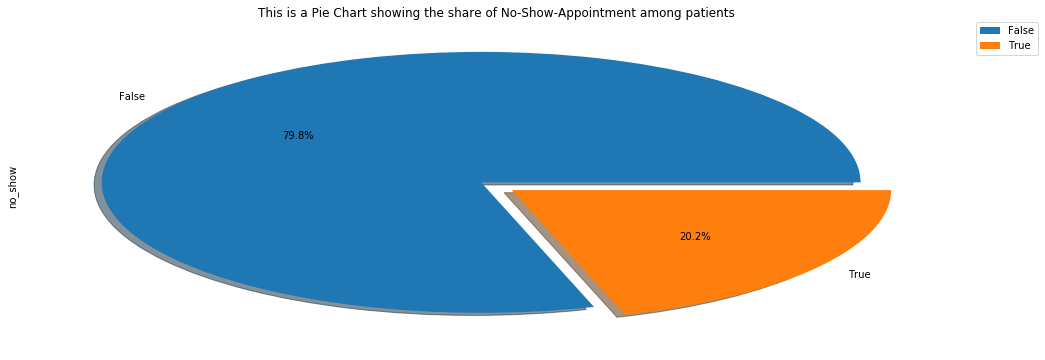

In [25]:
plt.figure(figsize = (17,6))
df_app.no_show.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.05,0.05], legend=True)
plt.title('This is a Pie Chart showing the share of No-Show-Appointment among patients')
plt.legend(bbox_to_anchor=(1,1.02), loc='upper left')

plt.show()

Calculate the total no_show count in data

In [26]:
total_value = df_app.groupby('no_show')['age'].value_counts()
total_value

no_show  age
False    0      2900
         1      1858
         52     1449
         56     1372
         2      1366
                ... 
True     95        6
         115       3
         97        2
         96        1
         98        1
Name: age, Length: 203, dtype: int64

In [27]:
# 22319 patients that did not show up on their appointed date make up 20% of all appointments
age_prop = df_app['no_show'].sum() / len(df_app.index)
age_prop

0.20193438647919945

Let's find the correlation between our data sets 

In [28]:
df_app.corr().style.background_gradient(cmap='OrRd')

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
age,1,-0.0924633,0.504586,0.292391,0.0958098,0.0837416,0.0126333,-0.0603268
scholarship,-0.0924633,1,-0.0197303,-0.0248944,0.035022,-0.00910378,0.00119196,0.0291336
hypertension,0.504586,-0.0197303,1,0.433085,0.0879701,0.0848511,-0.00626997,-0.0357035
diabetes,0.292391,-0.0248944,0.433085,1,0.0184731,0.0591445,-0.0145518,-0.0151812
alcoholism,0.0958098,0.035022,0.0879701,0.0184731,1,0.00369172,-0.0261485,-0.00019685
handicap,0.0837416,-0.00910378,0.0848511,0.0591445,0.00369172,1,-0.0252206,-0.00728141
sms_received,0.0126333,0.00119196,-0.00626997,-0.0145518,-0.0261485,-0.0252206,1,0.126428
no_show,-0.0603268,0.0291336,-0.0357035,-0.0151812,-0.00019685,-0.00728141,0.126428,1


The correlation table above shows high correlation between hypertension and age, diabetes and hypertension and diabetes and age.
I am going to plot a scatter plot to visually show the correlation between these datasets

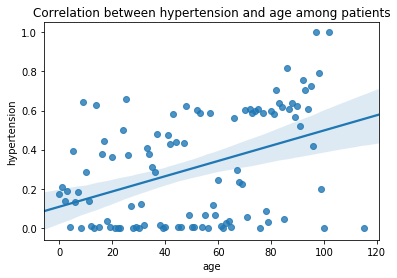

In [29]:
# From the table above, its evident that there are more people with hypertension among older patients from 0.5 as suggested above.
hyper_mean = df_app['hypertension'].groupby(df_app['age']).mean()
ages = df_app.age.unique()
sns.regplot(x=ages, y=hyper_mean)
plt.xlabel("age")
plt.title('Correlation between hypertension and age among patients');

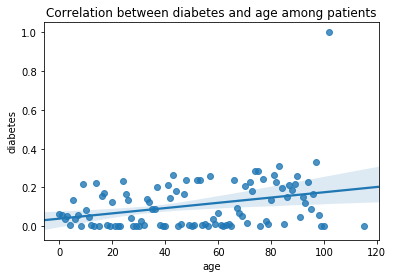

In [30]:
# From the correlation table above, there is a correlation between the age of a patient and diabetes
dia_mean = df_app["diabetes"].groupby(df_app["age"]).mean()
ages = df_app["age"].unique()
sns.regplot(x=ages, y=dia_mean)
plt.xlabel("age")
plt.title('Correlation between diabetes and age among patients');

There is a problem (outlier) with our plot. And this outlier is caused by the appointment of an older diabetic patient. I will resolve this by plotting it again and cutting out that outlier from our plot.

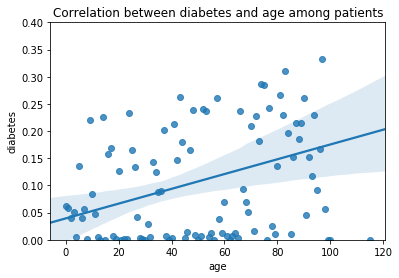

In [31]:
dia_mean = df_app["diabetes"].groupby(df_app["age"]).mean()
ages = df_app["age"].unique()
sns.regplot(x=ages, y=dia_mean)
plt.xlabel("age")
plt.title('Correlation between diabetes and age among patients')
plt.ylim(0,0.4)
plt.show()

In [32]:
def count_plot(df_appdata, xdata, fxlabel, fylabel, ftitle, fcolor=None, fpalette=None):
    f = sns.countplot(data = df_appdata, x = xdata, color = fcolor, palette = fpalette)
    plt.title(ftitle)
    plt.xlabel(fxlabel)
    plt.ylabel(fylabel)
    return f

In [33]:
def bar_plot(xdata, ydata, fxlabel, fylabel, ftitle, ferrwidth=None, fpalette=None):
    f = sns.barplot(x = xdata, y = ydata, errwidth = ferrwidth, palette = fpalette)
    f.set(xlabel = fxlabel, ylabel = fylabel, title = ftitle)
    return f

Lets find the proportion of patients on scholarship

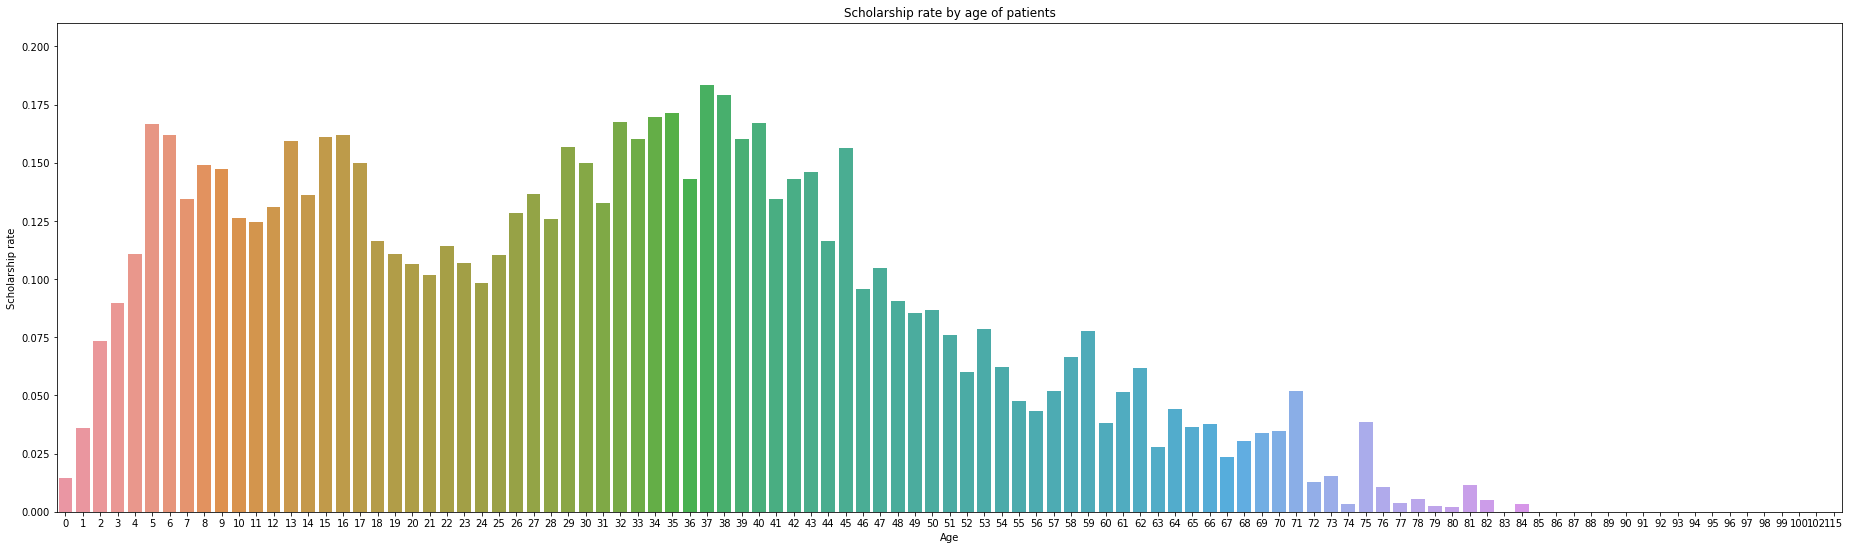

In [34]:
# This plot shows that scholarship was majorly given to children and adults between the ages of 1-45 years old
plt.figure(figsize=(32, 9))
bar_plot(df_app.age, df_app.scholarship, 'Age', 'Scholarship rate', 'Scholarship rate by age of patients', 0)
plt.show()

### Research Question 1 (Are those on Scholarship likely to show up on Appointment date?)

Amount of Appointments made by patients on scholarship

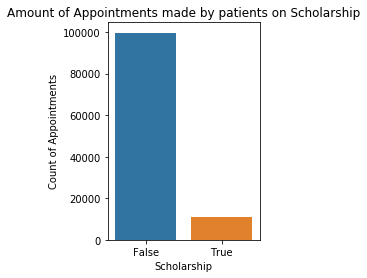

In [35]:
# From the plot it can be deduce that patients that are not on scholarship made quite a lot of appointments than those on scholarship
plt.subplot(1, 2, 1)
count_plot(df_app, 'scholarship', 'Scholarship', 'Count of Appointments', 'Amount of Appointments made by patients on Scholarship');

Let's make a Subplot of no_show rate for those on scholarship

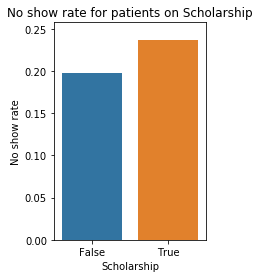

In [36]:
# The appointment of patients on scholarship have a higher no show rate than those without scholarship
plt.subplot(1, 2, 1)
f1 = bar_plot(df_app['scholarship'], df_app['no_show'], 'Scholarship', 'No show rate', 'No show rate for patients on Scholarship', 0)

### Research Question 2  (Are those being reached out by to SMS reminder more likely to show up on appointment date?)

Amount of Appointments made by patients who were sent an SMS reminder

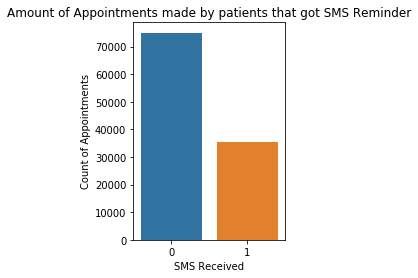

In [37]:
# From the plot it can be deduce that patients that did not receive SMS reminder made quite a lot of appointments than those that received SMS reminder.
# Although those that got SMS reminder made quite a large number of appointments
# While 0 represents 'No SMS received', 1 represents 'SMS received'
plt.subplot(1, 2, 1)
count_plot(df_app, 'sms_received', 'SMS Received', 'Count of Appointments', 'Amount of Appointments made by patients that got SMS Reminder');

Let's make a Subplot of no_show rate for those who received SMS reminder

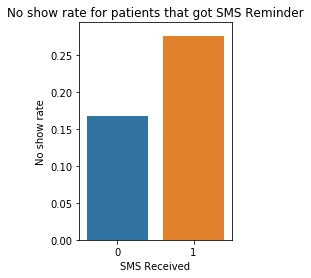

In [38]:
# The appointment of patients that received SMS reminder have a higher no show rate than those that did not receive SMS reminder
# While 0 represents 'No SMS received', 1 represents 'SMS received'
plt.subplot(1, 2, 1)
f2 = bar_plot(df_app['sms_received'], df_app['no_show'], 'SMS Received', 'No show rate', 'No show rate for patients that got SMS Reminder', 0)

### Research Question 3  (What Gender class take their appointment date more seriously?)

Amount of Appointments made by patients of both gender

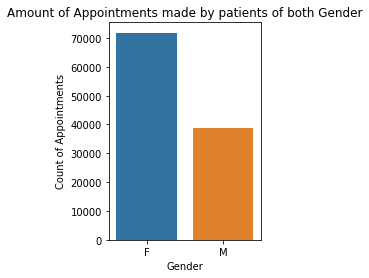

In [39]:
# From the plot it can be deduce that there are more Females scheduling for appointment than Male
plt.subplot(1, 2, 1)
count_plot(df_app, 'gender', 'Gender', 'Count of Appointments', 'Amount of Appointments made by patients of both Gender');

Let's make a Subplot of no_show rate for patients of both gender

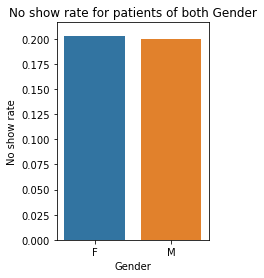

In [40]:
# There is no much difference in the no show rate proportion of both gender
plt.subplot(1, 2, 1)
f3 = bar_plot(df_app['gender'], df_app['no_show'], 'Gender', 'No show rate', 'No show rate for patients of both Gender',0)

<a id='conclusions'></a>
## Conclusions
> On these analysed data sets, the main findings for the given questions are as follows
> #### Q1: Are those on Scholarship likely to show up on Appointment date?
Appointment of patients with Scholarship have a higher No-Show rate compared to those without Scholarship and so are likely not to show up on appointment date.
> #### Q2: Are those being reached out to by SMS reminder more likely to show up on appointment date?
Appointment of patients with SMS reminder prior to their appointment have a higher No-Show rate than those without a reminder.
> #### Q3: What Gender class take their appointment date more seriously?
The male and the female gender class seem to have similar No-Show rate.

### Limitations

> 1). The data was sufficient to prove findings, but i could not dive deep into exporing all patients with illness and their no show rate combined, and also patients with scholarship and SMS Recieved with their no show rate combined. This would have further justify or skew our analysis results.

> 2). Further knowing the reasons for higher no show rate for those on scholarship and those that received SMS reminder could further justify our results. This could be attributed to the days of appointment which i could not analyse with coding.

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0